In [1]:
%run GAOperators.ipynb

"""
the previous  command import functions:
OnePoint_Crossover, TwoPoint_Crossover, Uniform_Crossover
FlipBit_Mutation
Random_Selection, Elitism_Selection, Tournament_Selection, RouletteWheel_Selection
"""

'\nthe previous  command import functions:\nOnePoint_Crossover, TwoPoint_Crossover, Uniform_Crossover\nFlipBit_Mutation\nRandom_Selection, Elitism_Selection, Tournament_Selection, RouletteWheel_Selection\n'

In [2]:
import random
import numpy as np
from operator import attrgetter
import matplotlib.pyplot as plt

# Knapsack problem parameters
num_items = 20
max_weight = 50
population_size = 50
num_generations = 100
mutation_rate = 0.1

In [3]:
# Generate initial population
def generate_population():
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(0, 1) for _ in range(len(weights))]
        population.append(chromosome)
    return population

In [4]:
# Calculate fitness for each chromosome
def calculate_fitness(chromosome):
	total_weight = 0
	total_value = 0
	for i in range(len(chromosome)):
		if chromosome[i] == 1:
			total_weight += items[i][0]
			total_value += items[i][1]
	if total_weight > max_weight:
		return 0
	else:
		return total_value

In [5]:
# Knapsack genetic algorithm
def knapsack_genetic_algorithm(crossover_func, mutation_func, selection_func):
    population = generate_population()
    best_individuals = []
    best_fitness_values = []
    for _ in range(num_generations):
        new_population = []
        while len(new_population) < population_size:
            parents = selection_func(population, 2)
            child1, child2 = crossover_func(parents[0], parents[1])
            child1 = mutation_func(child1, mutation_rate)
            child2 = mutation_func(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
        best_individual = max(population, key=calculate_fitness)
        best_individuals.append(best_individual)
        best_fitness = calculate_fitness(best_individual)
        best_fitness_values.append(best_fitness)
    return best_individuals, best_fitness_values

In [6]:
import random

num_items = 20

items = [[random.randint(1, 10), random.randint(1, 10)] for _ in range(num_items)]

print(items)

[[3, 9], [10, 6], [4, 5], [5, 10], [10, 7], [8, 9], [9, 2], [4, 3], [5, 3], [5, 4], [9, 4], [10, 3], [1, 10], [6, 5], [10, 3], [5, 6], [6, 3], [9, 5], [2, 1], [2, 2]]


In [7]:
values = [item[0] for item in items]
weights = [item[1] for item in items]

print(values)
print(weights)

[3, 10, 4, 5, 10, 8, 9, 4, 5, 5, 9, 10, 1, 6, 10, 5, 6, 9, 2, 2]
[9, 6, 5, 10, 7, 9, 2, 3, 3, 4, 4, 3, 10, 5, 3, 6, 3, 5, 1, 2]


In [8]:
# Define the selection, crossover, and mutation methods
selection_methods = {
    "Random Selection": Random_Selection,
    "Elitism Selection": Elitism_Selection,
    "Tournament Selection": Tournament_Selection,
    "Roulette Wheel Selection": RouletteWheel_Selection
}

crossover_methods = {
    "One Point Crossover": OnePoint_Crossover,
    "Two Point Crossover": TwoPoint_Crossover,
    "Uniform Crossover": Uniform_Crossover
}

mutation_method = FlipBit_Mutation

In [34]:
# Dictionary to store the results
results = {}

# Iterate over the selection methods
for selection_name, selection_method in selection_methods.items():
    # Iterate over the crossover methods
    for crossover_name, crossover_method in crossover_methods.items():
        # Initialize the population
        population = generate_population()
        best_individuals = []
        best_fitness_values = []

        # Main loop
        for _ in range(num_generations):
            # Select parents for crossover
            parents = selection_method(population, 2)

            # Apply crossover to create new offspring
            offspring = []
            for parent1, parent2 in zip(parents[::2], parents[1::2]):
                child1, child2 = crossover_method(parent1, parent2)
                offspring.extend([child1, child2])

            # Mutate the offspring
            offspring = [mutation_method(individual, mutation_rate) for individual in offspring]

            # Select individuals for the next generation
            population = Elitism_Selection(population + offspring, population_size)

            # Store the best individual and its fitness value
            best_individual = max(population, key=calculate_fitness)
            best_fitness = calculate_fitness(best_individual)
            best_individuals.append(best_individual)
            best_fitness_values.append(best_fitness)

        # Store the results for the current selection and crossover methods
        method_name = f"{selection_name} + {crossover_name}"
        results[method_name] = (best_individuals, best_fitness_values)


In [35]:
# Find the method with the best result
best_method = max(results, key=lambda x: max(results[x][1]))
best_individuals, best_fitness_values = results[best_method]

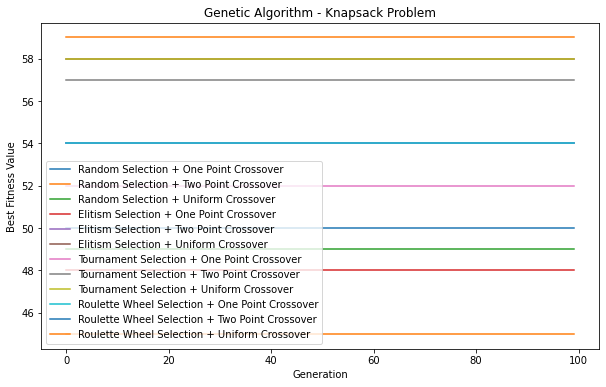

In [36]:
# Visualize the best fitness values for each method
plt.figure(figsize=(10, 6))
for method_name, (best_individuals, best_fitness_values) in results.items():
    plt.plot(best_fitness_values, label=method_name)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Genetic Algorithm - Knapsack Problem")
plt.legend()
plt.show()


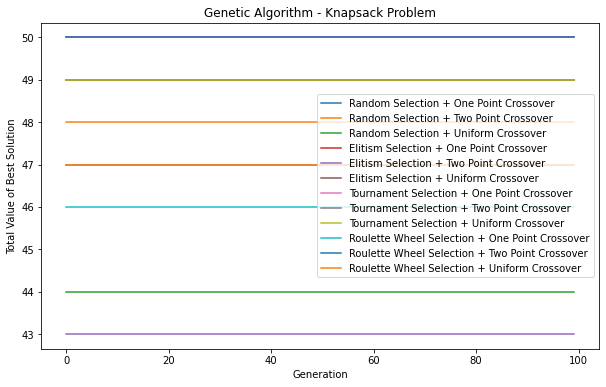

In [37]:
# Visualize the best solution for each method
plt.figure(figsize=(10, 6))
for method_name, (best_individuals, best_fitness_values) in results.items():
    best_values = [sum(value * item for value, item in zip(values, individual)) for individual in best_individuals]
    plt.plot(best_values, label=method_name)
plt.xlabel("Generation")
plt.ylabel("Total Value of Best Solution")
plt.title("Genetic Algorithm - Knapsack Problem")
plt.legend()
plt.show()

In [38]:
# Display the best method and its result
print("Best Method:", best_method)
print("Best Result:")
best_individual = best_individuals[-1]
best_fitness = best_fitness_values[-1]
print("Individual:", best_individual)
print("Fitness Value:", best_fitness)

Best Method: Random Selection + Two Point Crossover
Best Result:
Individual: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
Fitness Value: 45


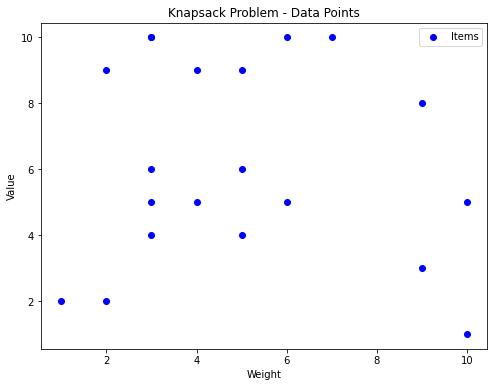

In [39]:
# Visualize the data points
plt.figure(figsize=(8, 6))
plt.scatter(weights, values, color='b', label='Items')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.title('Knapsack Problem - Data Points')
plt.legend()
plt.show()

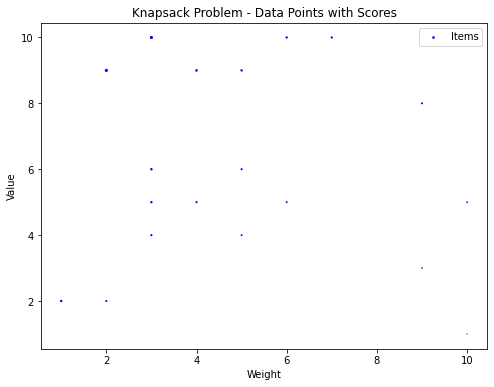

In [40]:
# Calculate the fitness values of the items
item_scores = [value * 1.0 / weight for value, weight in zip(values, weights)]

# Visualize the data points with scores
plt.figure(figsize=(8, 6))
plt.scatter(weights, values, s=item_scores, color='b', label='Items')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.title('Knapsack Problem - Data Points with Scores')
plt.legend()
plt.show()